In [120]:
import numpy as np 
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor
from xgboost import XGBClassifier
from sklearn.linear_model import LassoCV
from sklearn import metrics 
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV, cross_val_score
from scipy.stats import skew  # for some statistics
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
import lightgbm
import catboost

from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error

from mlxtend.regressor import StackingCVRegressor


import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from scipy.stats import skew

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import random 
import lightgbm as lgb
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error,roc_auc_score,precision_score

import h2o
from h2o.automl import H2OAutoML

from sklearn.metrics import classification_report,accuracy_score,roc_auc_score,precision_recall_curve,confusion_matrix,precision_score,confusion_matrix
from sklearn.tree import DecisionTreeClassifier

from sklearn.feature_selection import SelectFromModel

from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler

import pandas as pd   
import numpy as np    
import matplotlib.pyplot as plt 
%matplotlib inline
%config InlineBackend.figure_formats = ['retina']
import seaborn as sns
import time
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC, SVC
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, auc, roc_curve, log_loss
SEED = 42

In [121]:
df = pd.read_csv(r'C:\Users\Amey.R\Desktop\Kaggle Competition\Hackathon\train.csv')
df = df.set_index('Id')

In [122]:
df = df.drop_duplicates()

In [123]:
# Preprocessing Train Data
df['EduField_Dept'] = 0
for i, row in df.iterrows():
    if row['EducationField']=='Human Resources' and row['Department']=='Human Resources':
        df['EduField_Dept'][i] = 1
    elif row['EducationField']=='Life Sciences' and row['Department']=='Sales':
        df['EduField_Dept'][i] = 2
    elif row['EducationField']=='Life Sciences' and row['Department']=='Research & Development':
        df['EduField_Dept'][i] = 1
    elif row['EducationField']=='Medical' and row['Department']=='Sales':
        df['EduField_Dept'][i] = 2
    elif row['EducationField']=='Medical' and row['Department']=='Research & Development':
        df['EduField_Dept'][i] = 1
    elif row['EducationField']=='Technical Degree' and row['Department']=='Sales':
        df['EduField_Dept'][i] = 2
    elif row['EducationField']=='Technical Degree' and row['Department']=='Research & Development':
        df['EduField_Dept'][i] = 1
    elif row['EducationField']=='Marketing' and row['Department']=='Sales':
        df['EduField_Dept'][i] = 1
df['Edu_Age_TotalWorking'] = df['Education'] / (df['Age'] + df['TotalWorkingYears'])
df['CurrMgr_Coy'] = df['YearsWithCurrManager'] / (df['YearsAtCompany'] + 1)
df['CurrRole_CurrMgr'] = df['YearsInCurrentRole'] / (df['YearsWithCurrManager'] + 1)
# label encoding to clean up categorical data
categorical_data = {
    'BusinessTravel': {'Non-Travel':0, 'Travel_Frequently':1, 'Travel_Rarely':2}, 
    'Department': {'Human Resources':0, 'Research & Development':1, 'Sales':2}, 
    'EducationField': {'Human Resources':0, 'Life Sciences':1, 'Marketing':2, 'Medical':3, 'Technical Degree':4, 'Other':5}, 
    'Gender': {'Female':0, 'Male':0}, 
    'JobRole': {'Healthcare Representative':0, 'Human Resources':1, 'Laboratory Technician':2, 'Manager':3, 'Manufacturing Director':4, 'Research Director':5, 'Research Scientist':6, 'Sales Executive':7, 'Sales Representative':8}, 
    'MaritalStatus': {'Divorced':0, 'Single':1, 'Married':2}, 
    #'Over18': {'Y':1}, 
    'OverTime': {'No':0, 'Yes':1}    }
df = df.replace(categorical_data)

Top 10 Features: ['OverTime', 'TotalWorkingYears', 'Age', 'MonthlyIncome', 'YearsAtCompany', 'StockOptionLevel', 'CurrMgr_Coy', 'JobRole', 'Edu_Age_TotalWorking', 'YearsWithCurrManager']


(11.5, -0.5)

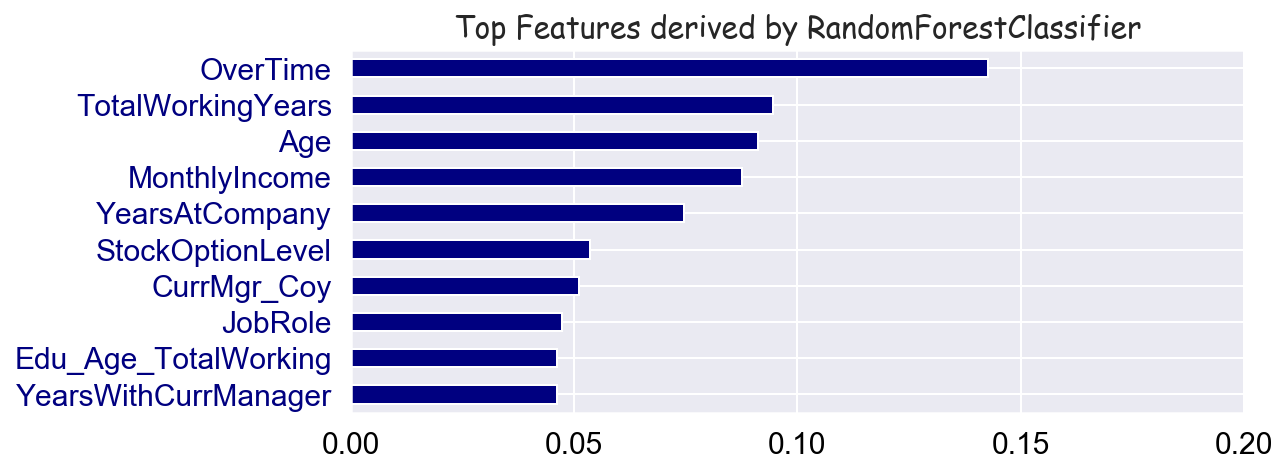

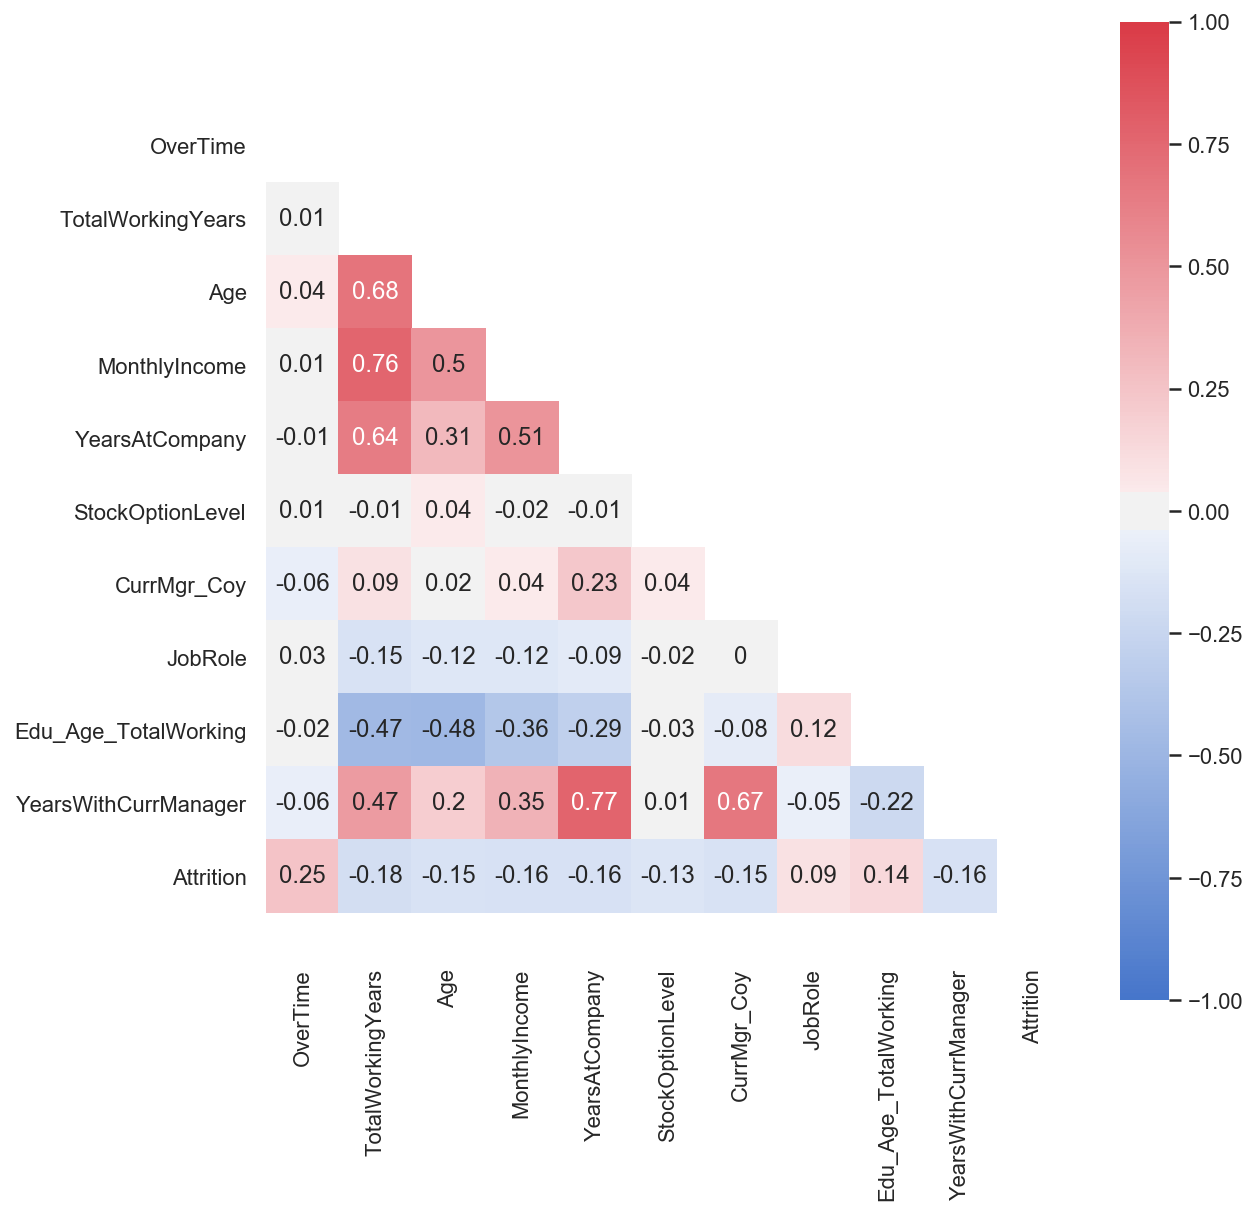

In [124]:
X, y = df.drop('Attrition', axis=1), df['Attrition']

# use RandomForestClassifier to look for important key features
n = 10    # specify n (top n features)
rfc = RandomForestClassifier(random_state=SEED, n_estimators=200, max_depth=3)
rfc_model = rfc.fit(X, y)
pd.Series(rfc_model.feature_importances_, index=X.columns).nlargest(n).plot(kind='barh', 
    figsize=[8, n/3], color='navy').invert_yaxis()    # most important feature is on top, ie, descending order
ticks_x = np.linspace(0, 0.2, 5)   # (start, end, number of ticks)
plt.xticks(ticks_x, fontsize=15, color='black')
plt.yticks(size=15, color='navy' )
plt.title('Top Features derived by RandomForestClassifier', family='fantasy', size=15)
top10_features = pd.Series(rfc_model.feature_importances_, index=X.columns).nlargest(10)
print('Top 10 Features:', list(top10_features.index))

# check for correlation between top 10 features
X = df.loc[:, top10_features.index]
y = df['Attrition']
df_top10 = X.join(y)
# correlation matrix heatmap visualization
sns.set(style="white")
# Generate a mask for the upper triangle
mask = np.zeros_like(df_top10.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure to control size of heatmap
fig, ax = plt.subplots(figsize=(9,9))
# Create a custom color palette
cmap = sns.diverging_palette(255, 10, as_cmap=True)  # as_cmap returns a matplotlib colormap object rather than a list of colors
# Red=10, Green=128, Blue=255
# Plot the heatmap
sns.heatmap(df_top10.corr().round(2), mask=mask, annot=True, annot_kws={"size": 12}, square=True, 
            cmap=cmap , vmin=-1, vmax=1, ax=ax)  # annot=True display corr label
# Prevent Heatmap Cut-Off Issue
bottom, top = ax.get_ylim()
ax.set_ylim(bottom+0.5, top-0.5)

In [125]:
# df = df.drop(columns=['YearsAtCompany','TotalWorkingYears','YearsWithCurrManager','Age'])

In [126]:
# define feature X and target y dataset (X and y are commonly used in sklearn)
X, y = df.drop('Attrition', axis=1), df['Attrition']
print('X', X.shape, 'y', y.shape)

# split data to 80:20 ratio for train/test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=SEED, stratify=y)
print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)

# kf = KFold(n_splits=5, shuffle=True, random_state=SEED)   # this may result in imbalance classes in each fold
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=SEED)   # use this

X (1000, 31) y (1000,)
X_train (800, 31)
y_train (800,)
X_test (200, 31)
y_test (200,)


In [127]:
## BASELINE model performance evaluation
# to define which metric and model to use
met = {'accuracy':True, 'precision':True, 'recall':True, 'f1score':True, 'rocauc':True, 'logloss':True}
mod = {'gnb':True, 'bnb':True, 'mnb':True, 'logr':True, 'knn':True, 'dt':True, 'rf':True, 'xgb':True, 'svc':True, 'lsvc':True}

# to give model baseline performance report in dataframe 
def metric(model, X_train, X_test, y_train, y_test, name):
    accuracy1 = accuracy2 = precision = recall = f1score = rocauc = logloss = 0.0
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    if met['accuracy']:
        accuracy1 = np.mean(cross_val_score(model, X_train, y_train, cv=kf, scoring='accuracy'))
        accuracy2 = accuracy_score(y_test, y_pred)
    if met['precision']: precision = np.mean(cross_val_score(model, X_train, y_train, cv=kf, scoring='precision'))
    if met['recall']:    recall    = np.mean(cross_val_score(model, X_train, y_train, cv=kf, scoring='recall'))
    if met['f1score']:   f1score   = np.mean(cross_val_score(model, X_train, y_train, cv=kf, scoring='f1'))
    if met['rocauc']:    rocauc    = np.mean(cross_val_score(model, X_train, y_train, cv=kf, scoring='roc_auc'))
    if met['logloss']:   logloss   = log_loss(y_test, y_pred)   # SVC & LinearSVC unable to use cvs

    return pd.DataFrame({'model'    : [name],
                         'accuracy' : [accuracy1],
                         'acc(test)': [accuracy2],
                         'precision': [precision],
                         'recall'   : [recall],
                         'f1score'  : [f1score],
                         'rocauc'   : [rocauc],
                         'logloss'  : [logloss],
                         'timetaken': [0.0]       })   # timetaken: to be used for comparison later

# to initialise an empty dataframe
rpt = pd.DataFrame({'model'    : [],
                    'accuracy' : [],
                    'acc(test)': [],
                    'precision': [],
                    'recall'   : [],
                    'f1score'  : [],
                    'rocauc'   : [],
                    'logloss'  : [],
                    'timetaken': []       })

# to initialise all baseline models
gnb = GaussianNB()
bnb = BernoulliNB()
mnb = MultinomialNB()
logr = LogisticRegression()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
xgb = XGBClassifier()
svc = SVC()
lsvc = LinearSVC()

if mod['gnb']:  rpt = pd.concat([rpt, metric(gnb, X_train, X_test, y_train, y_test, 'GaussianNB')])   # default axis=0
if mod['bnb']:  rpt = pd.concat([rpt, metric(bnb, X_train, X_test, y_train, y_test, 'BernoulliNB')])
if mod['mnb']:  rpt = pd.concat([rpt, metric(mnb, X_train, X_test, y_train, y_test, 'MultinomialNB')])
if mod['logr']: rpt = pd.concat([rpt, metric(logr, X_train, X_test, y_train, y_test, 'LogisticRegression')])
if mod['knn']:  rpt = pd.concat([rpt, metric(knn, X_train, X_test, y_train, y_test, 'KNearestNeighbour')])
if mod['dt']:   rpt = pd.concat([rpt, metric(dt, X_train, X_test, y_train, y_test, 'DecisionTree')])
if mod['rf']:   rpt = pd.concat([rpt, metric(rf, X_train, X_test, y_train, y_test, 'RandomForest')])
if mod['xgb']:  rpt = pd.concat([rpt, metric(xgb, X_train, X_test, y_train, y_test, 'XGBoost')])
if mod['svc']:  rpt = pd.concat([rpt, metric(svc, X_train, X_test, y_train, y_test, 'SVC')])
if mod['lsvc']: rpt = pd.concat([rpt, metric(lsvc, X_train, X_test, y_train, y_test, 'LinearSVC')])
rpt = rpt.reset_index(drop=True)
display(rpt)

## TUNED model performance evaluation
def tuning(model, X_train, X_test, y_train, y_test, name):
    print('\nSearch for OPTIMAL THRESHOLD, vary from 0.0001 to 0.9999, fit/predict on train/test data')
    model.fit(X_train, y_train)
    optimal_th = 0.5   # start with default threshold value
    
    for i in range(0,3):
        score_list = []
        print('\nLooping decimal place', i+1) 
        th_list = [np.linspace(optimal_th-0.4999, optimal_th+0.4999, 11), 
                   np.linspace(optimal_th-0.1,    optimal_th+0.1,    21), 
                   np.linspace(optimal_th-0.01,   optimal_th+0.01,   21)]
        for th in th_list[i]:
            if th<0: 
                score_list.append(-1)
                continue
            y_pred = (model.predict_proba(X_test)[:,1] >= th)
            f1scor = f1_score(y_test, y_pred)
            score_list.append(f1scor)
            print('{:.3f}->{:.4f}'.format(th, f1scor), end=',  ')   # display f1score in 4 decimal pl
        optimal_th = float(th_list[i][score_list.index(max(score_list))])

    print('optimal F1 score = {:.4f}'.format(max(score_list)))
    print('optimal threshold = {:.3f}'.format(optimal_th))

    print('\n', name, 'accuracy score is')
    accuracy1 = model.score(X_train, y_train)   # .score uses accuracy
    print('Training: {:.2f}%'.format(100*accuracy1))
    accuracy2 = model.score(X_test, y_test)
    print('Test set: {:.2f}%'.format(100*accuracy2))

    y_pred = (model.predict_proba(X_test)[:,1] >= 0.25)
    print('\nAdjust threshold to 0.25:')
    print('Precision: {:.4f},   Recall: {:.4f},   F1 Score: {:.4f}'.format(
        precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred)))
    print(confusion_matrix(y_test, y_pred))

    y_pred = model.predict(X_test)
    print('Default threshold of 0.50:')
    print('Precision: {:.4f},   Recall: {:.4f},   F1 Score: {:.4f}'.format(
        precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred)))
    print(confusion_matrix(y_test, y_pred))

    y_pred = (model.predict_proba(X_test)[:,1] >= 0.75)
    print('Adjust threshold to 0.75:')
    print('Precision: {:.4f},   Recall: {:.4f},   F1 Score: {:.4f}'.format(
        precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred)))
    print(confusion_matrix(y_test, y_pred))

    y_pred = (model.predict_proba(X_test)[:,1] >= optimal_th)
#     y_pred = [1 if x==True else 0 if x==False else x for x in y_pred]   # .predict->0/1; .predict_proba->False/True
    print('\nOptimal threshold {:.3f}'.format(optimal_th))
    precision    = precision_score(y_test, y_pred)
    recall       = recall_score(y_test, y_pred)
    f1score      = f1_score(y_test, y_pred)
    print('Precision: {:.4f},   Recall: {:.4f},   F1 Score: {:.4f}'.format(precision, recall, f1score))
    print(name, 'confusion matrix: \n', confusion_matrix(y_test, y_pred))
    
    y_pred = model.predict_proba(X_test)[:,1]   # use this at optimal th, for AUC and logloss
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    rocauc       = auc(fpr, tpr)
    print(name, 'AUC: {:.4f}'.format(rocauc))
    logloss      = log_loss(y_test, y_pred)   # same result using y_pred = model.predict_proba(X_test)
    print(name, 'Log-loss: {:.4f}'.format(logloss))

    return pd.DataFrame({'model'    : [name],
                         'accuracy' : [accuracy1],
                         'acc(test)': [accuracy2],
                         'precision': [precision],
                         'recall'   : [recall],
                         'f1score'  : [f1score],
                         'rocauc'   : [rocauc],
                         'logloss'  : [logloss],
                         'timetaken': [1000]       })   # timetaken: to be used for comparison late

# to initialise an empty dataframe
tuned = pd.DataFrame({'model'    : [],
                    'accuracy' : [],
                    'acc(test)': [],
                    'precision': [],
                    'recall'   : [],
                    'f1score'  : [],
                    'rocauc'   : [],
                    'logloss'  : [],
                    'timetaken': []       })

if mod['gnb']:
    print('\n"""""" GaussianNB """"""')
    time1 = time.time()
    gnb = GaussianNB()
    model_tuned = tuning(gnb, X_train, X_test, y_train, y_test, 'GaussianNB')
    model_tuned.timetaken[0] = time.time() - time1
    tuned = pd.concat([tuned, model_tuned])   # default axis=0

if mod['bnb']:
    print('\n"""""" BernoulliNB """"""')
    time1 = time.time()
    bnb = BernoulliNB()
    model_tuned = tuning(bnb, X_train, X_test, y_train, y_test, 'BernoulliNB')
    model_tuned.timetaken[0] = time.time() - time1
    tuned = pd.concat([tuned, model_tuned])   # default axis=0

if mod['mnb']:
    print('\n"""""" MultinomialNB """"""')
    time1 = time.time()
    mnb = MultinomialNB()
    model_tuned = tuning(mnb, X_train, X_test, y_train, y_test, 'MultinomialNB')
    model_tuned.timetaken[0] = time.time() - time1
    tuned = pd.concat([tuned, model_tuned])   # default axis=0

if mod['logr']:
    print('\n"""""" LogisticRegression """"""')
    time1 = time.time()
    print('\nSearch for optimal hyperparameter C in LogisticRegresssion, vary C from 0.001 to 1000, using KFold CV on train data')
    score_list = []
    c_list = 10**np.linspace(-3,3,200)
    for c in c_list:
        logr = LogisticRegression(C = c)
        cvs = (cross_val_score(logr, X_train, y_train, cv=kf, scoring='f1')).mean()
        score_list.append(cvs)
        print('{:.4f}'.format(cvs), end=", ")   # 4 decimal pl
    print('optimal cv F1 score = {:.4f}'.format(max(score_list)))
    optimal_c = float(c_list[score_list.index(max(score_list))])
    print('optimal value of C = {:.3f}'.format(optimal_c))
    logr = LogisticRegression(C = optimal_c)
    model_tuned = tuning(logr, X_train, X_test, y_train, y_test, 'LogisticRegression')
    model_tuned.timetaken[0] = time.time() - time1
    tuned = pd.concat([tuned, model_tuned])   # default axis=0
    
if mod['knn']:
    print('\n"""""" KNN """""" ')
    time1 = time.time()
    print('\nSearch for optimal hyperparameter K in KNN, vary K from 1 to 20, using KFold CV on train data')
    k_scores = []
    for k in range(1, 21):
        knn = KNeighborsClassifier(n_neighbors = k)
        cvs = cross_val_score(knn, X_train, y_train, cv=kf, scoring='f1').mean()
        k_scores.append(cvs)
        print('{:.4f}'.format(cvs), end=", ")
    print('optimal cv F1 score = {:.4f}'.format(max(k_scores)))   # 4 decimal pl
    optimal_k = k_scores.index(max(k_scores)) + 1   # index 0 is for k=1
    print('optimal value of K =', optimal_k)
    knn = KNeighborsClassifier(n_neighbors = optimal_k)
    model_tuned = tuning(knn, X_train, X_test, y_train, y_test, 'KNearestNeighbour')
    model_tuned.timetaken[0] = time.time() - time1
    tuned = pd.concat([tuned, model_tuned])   # default axis=0
    
if mod['dt']:
    print('\n"""""" DecisionTreeClassifier """"""')
    time1 = time.time()
    print('\nSearch for optimal max_depth in DecisionTree, vary from 2 to 10, using KFold CV on train data')
    d_scores = []
    for d in range(2, 11):
        dt = DecisionTreeClassifier(max_depth=d, random_state=SEED)
        cvs = cross_val_score(dt, X_train, y_train, cv=kf, scoring='f1').mean()
        d_scores.append(cvs)
        print('{:.4f}'.format(cvs), end=", ")
    print('optimal F1 score = {:.4f}'.format(max(d_scores)))   # 4 decimal pl
    optimal_d = d_scores.index(max(d_scores)) + 2   # index 0 is for d=2
    print('optimal max_depth =', optimal_d)
    dt = DecisionTreeClassifier(max_depth=optimal_d, random_state=SEED)
    model_tuned = tuning(dt, X_train, X_test, y_train, y_test, 'DecisionTree')
    model_tuned.timetaken[0] = time.time() - time1
    tuned = pd.concat([tuned, model_tuned])   # default axis=0
    # Note: results keep changing in each run
    
if mod['rf']:
    print('\n"""""" RandomForestClassifier """""" (quite slow)')
    time1 = time.time()
    print('\nSearch for optimal n_estimators in RandomForest, vary from 100 to 500, using KFold CV on train data')
    score_list = []
    n_list = [100, 150, 200, 250, 300, 350, 400, 450, 500]
    for n in n_list:
        rf = RandomForestClassifier(n_estimators=n)
        cvs = (cross_val_score(rf, X_train, y_train, cv=kf, scoring='f1')).mean()
        score_list.append(cvs)
        print('{:.0f}->{:.4f}'.format(n, cvs), end=", ")   # display score in 4 decimal place
    print('optimal F1 score = {:.4f}'.format(max(score_list)))
    optimal_n = int(n_list[score_list.index(max(score_list))])
    print('optimal n_estimators = {:.0f}'.format(optimal_n))
    rf = RandomForestClassifier(n_estimators=optimal_n)
    model_tuned = tuning(rf, X_train, X_test, y_train, y_test, 'RandomForest')
    model_tuned.timetaken[0] = time.time() - time1
    tuned = pd.concat([tuned, model_tuned])   # default axis=0
    # Note: results keep changing in each run
    
if mod['xgb']:
    print('\n"""""" XGBClassifier """""" (quite slow)')
    time1 = time.time()
    print('\nSearch for optimal n_estimators in XGBClassifier, vary from 100 to 500, using KFold CV on train data')
    score_list = []
    n_list = [100, 150, 200, 250, 300, 350, 400, 450, 500]
    for n in n_list:
        xgb = XGBClassifier(n_estimators=n)
        cvs = (cross_val_score(xgb, X_train, y_train, cv=kf, scoring='f1')).mean()
        score_list.append(cvs)
        print('{:.0f}->{:.4f}'.format(n, cvs), end=", ")   # display score in 4 decimal place
    print('optimal F1 score = {:.4f}'.format(max(score_list)))
    optimal_n = int(n_list[score_list.index(max(score_list))])
    print('optimal n_estimators = {:.0f}'.format(optimal_n))
    print('\nSearch for optimal max_depth in XGBClassifier, vary from 2 to 10, using KFold CV on train data')
    d_scores = []
    for d in range(2, 11):
        xgb = XGBClassifier(n_estimators=optimal_n, max_depth=d)
        cvs = cross_val_score(xgb, X_train, y_train, cv=kf, scoring='f1').mean()
        d_scores.append(cvs)
        print('{:.4f}'.format(cvs), end=", ")
    print('optimal F1 score = {:.4f}'.format(max(d_scores)))   # 4 decimal pl
    optimal_d = d_scores.index(max(d_scores)) + 2   # index 0 is for d=2
    print('optimal max_depth =', optimal_d)
    xgb = XGBClassifier(n_estimators=optimal_n, max_depth=optimal_d)
    model_tuned = tuning(xgb, X_train, X_test, y_train, y_test, 'XGBoost')
    model_tuned.timetaken[0] = time.time() - time1
    tuned = pd.concat([tuned, model_tuned])   # default axis=0
    
if mod['svc']:
    print('\n"""""" SVC """"""')
    time1 = time.time()
    svc = SVC(gamma='scale', probability=True)
    model_tuned = tuning(svc, X_train, X_test, y_train, y_test, 'SVC')
    model_tuned.timetaken[0] = time.time() - time1
    tuned = pd.concat([tuned, model_tuned])   # default axis=0
    
if mod['lsvc']:
    print('\n"""""" LinearSVC """"""')
    time1 = time.time()
    lsvc = LinearSVC()    # model has no attribute 'predict_proba'
    lsvc.fit(X_train, y_train)
    print('LinearSVC accuracy score is')
    accuracy1 = lsvc.score(X_train, y_train)   # .score uses accuracy
    print('Training: {:.2f}%'.format(100*accuracy1))
    accuracy2 = lsvc.score(X_test, y_test)
    print('Test set: {:.2f}%'.format(100*accuracy2))
    y_pred = lsvc.predict(X_test)
    print(classification_report(y_test, y_pred))
    print('LinearSVC confusion matrix: \n', confusion_matrix(y_test, y_pred))
    precision    = precision_score(y_test, y_pred)
    recall       = recall_score(y_test, y_pred)
    f1score      = f1_score(y_test, y_pred) 
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    rocauc       = auc(fpr, tpr)
    logloss      = log_loss(y_test, y_pred)
    print('LinearSVC AUC: {:.4f}'.format(rocauc))
    print('LinearSVC Log-loss: {:.4f}'.format(logloss))
    tuned = pd.concat([tuned, pd.DataFrame({'model'    : ['LinearSVC'],
                                            'accuracy' : [accuracy1],
                                            'acc(test)': [accuracy2],
                                            'precision': [precision],
                                            'recall'   : [recall],
                                            'f1score'  : [f1score],
                                            'rocauc'   : [rocauc],
                                            'logloss'  : [logloss],
                                            'timetaken': [time.time() - time1] }) ])   # default axis=0
tuned = tuned.reset_index(drop=True)

,model,accuracy,acc(test),precision,recall,f1score,rocauc,logloss,timetaken
0,GaussianNB,0.77125,0.780,0.356984,0.555385,0.431953,0.732863,7.598675,0.0
1,BernoulliNB,0.79750,0.795,0.338937,0.301538,0.318242,0.736419,7.080537,0.0
2,MultinomialNB,0.54875,0.515,0.198479,0.618154,0.300313,0.601975,16.751642,0.0
3,LogisticRegression,0.85000,0.840,0.505000,0.104000,0.167709,0.740673,5.526212,0.0
4,KNearestNeighbour,0.82125,0.825,0.307865,0.117846,0.167681,0.522169,6.044310,0.0
5,DecisionTree,0.77750,0.790,0.290389,0.356615,0.306666,0.575992,7.253235,0.0
6,RandomForest,0.84000,0.860,0.720000,0.079385,0.132721,0.789123,4.835433,0.0
7,XGBoost,0.84750,0.875,0.529744,0.245846,0.331180,0.785452,4.317355,0.0
8,SVC,0.84250,0.845,0.000000,0.000000,0.000000,0.574109,5.353510,0.0
9,LinearSVC,0.57625,0.175,0.066667,0.200000,0.051534,0.659810,28.495146,0.0



"""""" GaussianNB """"""

Search for OPTIMAL THRESHOLD, vary from 0.0001 to 0.9999, fit/predict on train/test data

Looping decimal place 1
0.000->0.2752,  0.100->0.3399,  0.200->0.3796,  0.300->0.4310,  0.400->0.4948,  0.500->0.5111,  0.600->0.5610,  0.700->0.5672,  0.800->0.4783,  0.900->0.3243,  1.000->0.0000,  
Looping decimal place 2
0.600->0.5610,  0.610->0.5610,  0.620->0.5500,  0.630->0.5641,  0.640->0.5526,  0.650->0.5333,  0.660->0.5205,  0.670->0.5205,  0.680->0.5278,  0.690->0.5352,  0.700->0.5672,  0.710->0.5846,  0.720->0.5714,  0.730->0.5714,  0.740->0.5574,  0.750->0.5763,  0.760->0.5614,  0.770->0.5185,  0.780->0.4490,  0.790->0.4681,  0.800->0.4783,  
Looping decimal place 3
0.700->0.5672,  0.701->0.5672,  0.702->0.5672,  0.703->0.5672,  0.704->0.5672,  0.705->0.5758,  0.706->0.5758,  0.707->0.5758,  0.708->0.5758,  0.709->0.5846,  0.710->0.5846,  0.711->0.5846,  0.712->0.5846,  0.713->0.5846,  0.714->0.5938,  0.715->0.5938,  0.716->0.5938,  0.717->0.5938,  0.718->0.

0.000->0.2684,  0.100->0.2684,  0.200->0.0000,  0.300->0.0000,  0.400->0.0000,  0.500->0.0000,  0.600->0.0000,  0.700->0.0000,  0.800->0.0000,  0.900->0.0000,  1.000->0.0000,  
Looping decimal place 2
0.000->0.2684,  0.010->0.2684,  0.020->0.2684,  0.030->0.2684,  0.040->0.2684,  0.050->0.2684,  0.060->0.2684,  0.070->0.2684,  0.080->0.2684,  0.090->0.2684,  0.100->0.2684,  
Looping decimal place 3
0.000->0.2684,  0.001->0.2684,  0.002->0.2684,  0.003->0.2684,  0.004->0.2684,  0.005->0.2684,  0.006->0.2684,  0.007->0.2684,  0.008->0.2684,  0.009->0.2684,  0.010->0.2684,  optimal F1 score = 0.2684
optimal threshold = 0.000

 SVC accuracy score is
Training: 84.25%
Test set: 84.50%

Adjust threshold to 0.25:
Precision: 0.0000,   Recall: 0.0000,   F1 Score: 0.0000
[[169   0]
 [ 31   0]]
Default threshold of 0.50:
Precision: 0.0000,   Recall: 0.0000,   F1 Score: 0.0000
[[169   0]
 [ 31   0]]
Adjust threshold to 0.75:
Precision: 0.0000,   Recall: 0.0000,   F1 Score: 0.0000
[[169   0]
 [ 31  

In [128]:
print('Baseline model performance:')
display(rpt)
print('After tuning hyperparameters:')
display(tuned)

# initialise an empty df for comparison: 1 = improved, 0 = no improvement
print('Comparison: 1 = improved, 0 = no improvement')
n = rpt.shape[0]
df_compare = pd.DataFrame({'model':[0]*n, 'accuracy':[0]*n, 'acc(test)':[0]*n, 'precision':[0]*n, 'recall':[0]*n,
                           'f1score':[0]*n, 'rocauc':[0]*n, 'logloss':[0]*n, 'timetaken':[0]*n})
df_compare.model = rpt.model
for i in range(1,7):
    for j in range(n):
        if tuned[tuned.columns[i]][j] >= rpt[rpt.columns[i]][j]:
            df_compare[df_compare.columns[i]][j] = 1
for i in range(7,9):
    for j in range(n):
        if tuned[tuned.columns[i]][j] <= rpt[rpt.columns[i]][j]:
            df_compare[df_compare.columns[i]][j] = 1
display(df_compare)

Baseline model performance:


,model,accuracy,acc(test),precision,recall,f1score,rocauc,logloss,timetaken
0,GaussianNB,0.77125,0.780,0.356984,0.555385,0.431953,0.732863,7.598675,0.0
1,BernoulliNB,0.79750,0.795,0.338937,0.301538,0.318242,0.736419,7.080537,0.0
2,MultinomialNB,0.54875,0.515,0.198479,0.618154,0.300313,0.601975,16.751642,0.0
3,LogisticRegression,0.85000,0.840,0.505000,0.104000,0.167709,0.740673,5.526212,0.0
4,KNearestNeighbour,0.82125,0.825,0.307865,0.117846,0.167681,0.522169,6.044310,0.0
5,DecisionTree,0.77750,0.790,0.290389,0.356615,0.306666,0.575992,7.253235,0.0
6,RandomForest,0.84000,0.860,0.720000,0.079385,0.132721,0.789123,4.835433,0.0
7,XGBoost,0.84750,0.875,0.529744,0.245846,0.331180,0.785452,4.317355,0.0
8,SVC,0.84250,0.845,0.000000,0.000000,0.000000,0.574109,5.353510,0.0
9,LinearSVC,0.57625,0.175,0.066667,0.200000,0.051534,0.659810,28.495146,0.0


After tuning hyperparameters:


,model,accuracy,acc(test),precision,recall,f1score,rocauc,logloss,timetaken
0,GaussianNB,0.78625,0.780,0.575758,0.612903,0.593750,0.808933,0.526525,0.000000
1,BernoulliNB,0.80125,0.795,0.428571,0.387097,0.406780,0.772189,0.483401,0.000000
2,MultinomialNB,0.55000,0.515,0.182692,0.612903,0.281481,0.557167,16.084211,0.000000
3,LogisticRegression,0.85125,0.835,0.283951,0.741935,0.410714,0.701088,0.405378,29.000000
4,KNearestNeighbour,0.85250,0.825,0.333333,0.354839,0.343750,0.659954,1.820852,1.000000
5,DecisionTree,0.97625,0.820,0.413793,0.387097,0.400000,0.580073,5.146649,0.000000
6,RandomForest,1.00000,0.860,0.684211,0.419355,0.520000,0.779634,0.356718,24.000000
7,XGBoost,1.00000,0.885,0.705882,0.387097,0.500000,0.780874,0.495018,29.000000
8,SVC,0.84250,0.845,0.155000,1.000000,0.268398,0.682573,0.429530,0.000000
9,LinearSVC,0.84250,0.845,0.000000,0.000000,0.000000,0.500000,5.353510,0.101727


Comparison: 1 = improved, 0 = no improvement


,model,accuracy,acc(test),precision,recall,f1score,rocauc,logloss,timetaken
0,GaussianNB,1,1,1,1,1,1,1,1
1,BernoulliNB,1,1,1,1,1,1,1,1
2,MultinomialNB,1,1,0,0,0,0,1,1
3,LogisticRegression,1,0,0,1,1,0,1,0
4,KNearestNeighbour,1,1,1,1,1,1,1,0
5,DecisionTree,1,1,1,1,1,1,1,1
6,RandomForest,1,1,0,1,1,0,1,0
7,XGBoost,1,1,1,1,1,0,1,0
8,SVC,1,1,1,1,1,1,1,1
9,LinearSVC,1,1,0,0,0,0,1,0


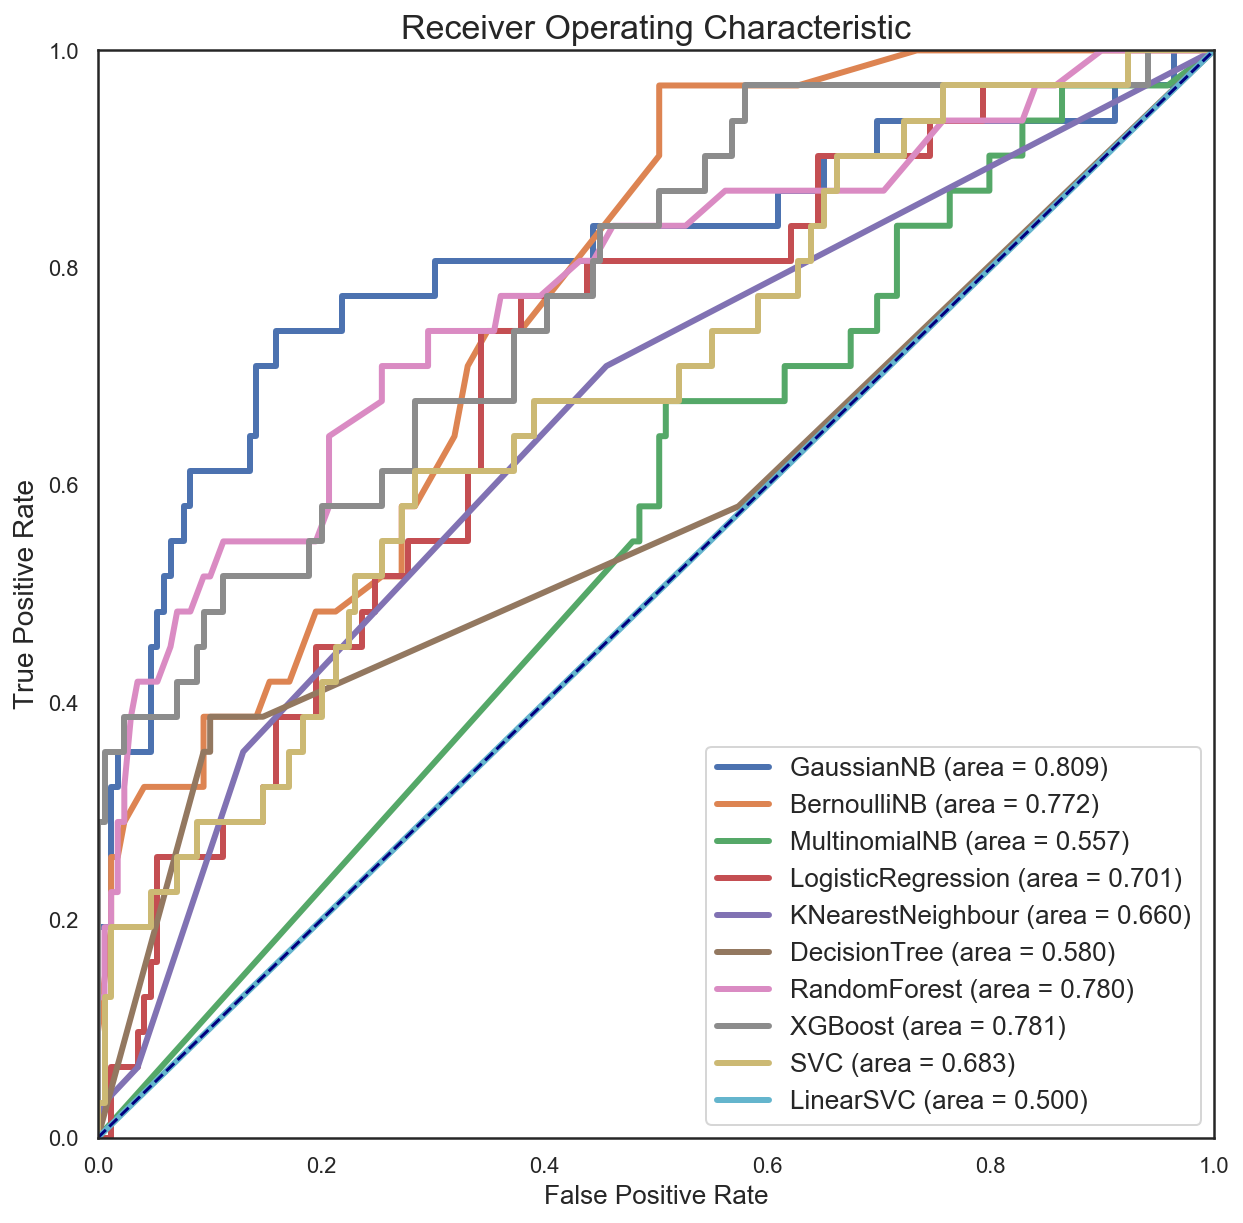

In [129]:
# plot the ROC curves
plt.figure(figsize=(10,10))

model_name = [gnb, bnb, mnb, logr, knn, dt, rf, xgb, svc, lsvc]
# model_name = [gnb, bnb, mnb, logr, knn, dt, rf, svc, lsvc]

for i in range(len(model_name)-1):
    y_pred = model_name[i].predict_proba(X_test)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    plt.plot(fpr, tpr, lw=3, label=tuned.model[i] + ' (area = %0.3f)' % auc(fpr, tpr))

y_pred = lsvc.predict(X_test)   # linearsvc has no attribute 'predict_proba'
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, lw=3, label='LinearSVC (area = %0.3f)' % auc(fpr, tpr))

plt.plot([0, 1], [0, 1], color='navy', lw=1.5, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate', fontsize=13)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('Receiver Operating Characteristic', fontsize=17)
plt.legend(loc='lower right', fontsize=13)
plt.show()

In [139]:
test = pd.read_csv(r'C:\Users\Amey.R\Desktop\Kaggle Competition\Hackathon\test.csv')
test = test.set_index('Id')

In [140]:
test['EduField_Dept'] = 0
for i, row in test.iterrows():
    if row['EducationField']=='Human Resources' and row['Department']=='Human Resources':
        test['EduField_Dept'][i] = 1
    elif row['EducationField']=='Life Sciences' and row['Department']=='Sales':
        test['EduField_Dept'][i] = 2
    elif row['EducationField']=='Life Sciences' and row['Department']=='Research & Development':
        test['EduField_Dept'][i] = 1
    elif row['EducationField']=='Medical' and row['Department']=='Sales':
        test['EduField_Dept'][i] = 2
    elif row['EducationField']=='Medical' and row['Department']=='Research & Development':
        test['EduField_Dept'][i] = 1
    elif row['EducationField']=='Technical Degree' and row['Department']=='Sales':
        test['EduField_Dept'][i] = 2
    elif row['EducationField']=='Technical Degree' and row['Department']=='Research & Development':
        test['EduField_Dept'][i] = 1
    elif row['EducationField']=='Marketing' and row['Department']=='Sales':
        test['EduField_Dept'][i] = 1
test['Edu_Age_TotalWorking'] = test['Education'] / (test['Age'] + test['TotalWorkingYears'])
test['CurrMgr_Coy'] = test['YearsWithCurrManager'] / (test['YearsAtCompany'] + 1)
test['CurrRole_CurrMgr'] = test['YearsInCurrentRole'] / (test['YearsWithCurrManager'] + 1)

# label encoding to clean up categorical data
categorical_data = {
    'BusinessTravel': {'Non-Travel':0, 'Travel_Frequently':1, 'Travel_Rarely':2}, 
    'Department': {'Human Resources':0, 'Research & Development':1, 'Sales':2}, 
    'EducationField': {'Human Resources':0, 'Life Sciences':1, 'Marketing':2, 'Medical':3, 'Technical Degree':4, 'Other':5}, 
    'Gender': {'Female':0, 'Male':0}, 
    'JobRole': {'Healthcare Representative':0, 'Human Resources':1, 'Laboratory Technician':2, 'Manager':3, 'Manufacturing Director':4, 'Research Director':5, 'Research Scientist':6, 'Sales Executive':7, 'Sales Representative':8}, 
    'MaritalStatus': {'Divorced':0, 'Single':1, 'Married':2}, 
    #'Over18': {'Y':1}, 
    'OverTime': {'No':0, 'Yes':1}    }
test = test.replace(categorical_data)

In [141]:
# test = test.drop(columns=['YearsAtCompany','TotalWorkingYears','YearsWithCurrManager','Age'])

In [148]:
test_predict = xgb.predict_proba(test)

In [152]:
output = pd.DataFrame({'Id': test.index,
                       'Attrition': (test_predict[:,1])})

output.to_csv('Attrition.csv', index=False)

In [154]:
output

,Id,Attrition
0,1,0.000047
1,2,0.000534
2,3,0.000061
3,4,0.001626
4,5,0.000430
...,...,...
465,466,0.065403
466,467,0.998042
467,468,0.021268
468,469,0.015531
